<font size = '5'><b>HA3 Programming Languages 2</b></font>

<font size = '3.5'><b>Masirdinov Nurmukhamed</b></font>

<b> Handling Missing Data Questions: </b>
- How do you identify and handle missing values in a Pandas DataFrame?
-  What is imputation, and why might it be useful in dealing with missing data?


For the first question, we have some functions in pandas module, such as
<code>
.isna<code>(<code>)
.dropn<code>a()
.fillna()

Let's take a look for DataFrame included with some NaN values and how the operation go through it.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'A': [1, 2, None, 4],
        'B': [None, 5, 6, 7],
        'C': [8, 9, 10, None]}
some_data = pd.DataFrame(data)
print(some_data)

print(some_data.isna())


some_data_dropped = some_data.dropna()
print(some_data_dropped)

data_filled = some_data.fillna(0)
print(data_filled)




     A    B     C
0  1.0  NaN   8.0
1  2.0  5.0   9.0
2  NaN  6.0  10.0
3  4.0  7.0   NaN
       A      B      C
0  False   True  False
1  False  False  False
2   True  False  False
3  False  False   True
     A    B    C
1  2.0  5.0  9.0
     A    B     C
0  1.0  0.0   8.0
1  2.0  5.0   9.0
2  0.0  6.0  10.0
3  4.0  7.0   0.0


<b> Imputation </b>

Imputation is the process of replacing missing data with substituted values. It can be useful because:
  - Many machine learning algorithms cannot handle missing data, so imputation allows you to use these algorithms.
  - Imputing missing data can help maintain the size and integrity of the dataset.
  - It helps in preserving patterns and relationships present in the data.
  - It can reduce bias that may result from complete case analysis (i.e., excluding cases with missing values).

<b>Data Transformation Questions</b>

<font size='3.5'>How can you encode categorical variables in a Pandas DataFrame?</font>

Encoding categorical variables involves converting categorical data (i.e., data that represents categories or labels) into a numerical format that machine learning algorithms can understand. Categorical variables can take on a limited, fixed number of possible values, such as colors, types of fruit, or levels of education. There are methods of encoding:

<font size='3'>1.Ordinal encoding:</font>
-  Ordinal encoding is similar to label encoding but allows for custom mapping of categories to specific integers based on a predefined order.
-  Unlike label encoding, where the mapping is based on the order of appearance, ordinal encoding allows for explicit control over the mapping.
-  Ordinal encoding is suitable for categorical variables with a natural order or hierarchy, where the numerical labels reflect the inherent order of the categories.
-  Example: If the original categorical column represents levels of education ('low', 'medium', 'high'), ordinal encoding can map them to integers 1, 2, and 3, respectively, based on their order of importance or level.

In [23]:
data_set = {'category': ['low', 'high', 'high', 'medium', 'low','medium','low']}
df_od = pd.DataFrame(data_set)
mapping = {'low': 1, 'medium': 2, 'high': 3}
df_od['encoded_category'] = df_od['category'].map(mapping)
print("Original DataFrame:")
print(df_od)

Original DataFrame:
  category  encoded_category
0      low                 1
1     high                 3
2     high                 3
3   medium                 2
4      low                 1
5   medium                 2
6      low                 1


<font size='3'>2.Pandas <code>factorize()</code> The pandas <code>factorize()</code> function is used to encode categorical data. It returns a tuple containing two elements:</font>
-  An array of integers representing the numerical labels of the categorical data.
-  An Index object that contains the unique categories in the data, along with their corresponding integer codes. Example: the original categorical column 'category' with values ['A', 'B', 'C', 'A', 'C'] is encoded using the <code>factorize()</code> function. The encoded labels are assigned to the labels array, while the unique categories are stored in the <code>unique_categories</code> Index array. The encoded labels are then added as a new column 'encoded_category' to the DataFrame <code>df_fact</code>. Finally, both the original DataFrame and the encoded labels along with their corresponding unique categories are printing for reference.

In [24]:
data_fact = {'category': ['A', 'B', 'C', 'A', 'C']}
df_fact = pd.DataFrame(data_fact)
labels, unique_categories = pd.factorize(df_fact['category'])
df_fact['encoded_category'] = labels
print("Original DataFrame:")
print(df_fact)
print("\nEncoded labels:")
print(labels)
print("\nUnique categories:")
print(unique_categories)

Original DataFrame:
  category  encoded_category
0        A                 0
1        B                 1
2        C                 2
3        A                 0
4        C                 2

Encoded labels:
[0 1 2 0 2]

Unique categories:
Index(['A', 'B', 'C'], dtype='object')


<font size='3'>What is one-hot encoding, and when would you use it in data preprocessing?</font>

In Python, you can perform one-hot encoding using the <code>get_dummies()</code> function from the pandas library. After identifying categorical variables in your dataset, you can use this function to automatically convert them into one-hot encoded format. Each category becomes a new binary column in the DataFrame, with 1s indicating the presence of that category and 0s indicating absence.

In [25]:

data = pd.DataFrame({'color': ['red', 'green', 'blue', 'green', 'red', 'blue','purple']})
one_hot_encoded = pd.get_dummies(data['color'])
print(one_hot_encoded)




    blue  green  purple    red
0  False  False   False   True
1  False   True   False  False
2   True  False   False  False
3  False   True   False  False
4  False  False   False   True
5   True  False   False  False
6  False  False    True  False


<b>Removing Duplicates questions </b>

<font size='3'>How do you identify and remove duplicate rows from a DataFrame?<font>

Duplicate rows in a DataFrame are rows that have identical values across all columns.

To identify duplicate rows in a DataFrame in Pandas, we can use the <code>duplicated()</code> method. 
This method returns a boolean Series indicating whether each row is a duplicate of a previous row. 
For example:

In [26]:
some_data_dpl = {'A': [1, 2, 3, 4, 2],
        'B': ['a', 'b', 'c', 'd', 'b']}
df_dpl = pd.DataFrame(some_data_dpl)

duplicate_mask = df_dpl.duplicated()

print("Original DataFrame:\n")
print(df_dpl)
print("Duplicated Mask:")
print(duplicate_mask)

Original DataFrame:

   A  B
0  1  a
1  2  b
2  3  c
3  4  d
4  2  b
Duplicated Mask:
0    False
1    False
2    False
3    False
4     True
dtype: bool


To remove duplicate rows from a DataFrame in Pandas, we can use the <code>drop_duplicates()</code> method.
This method removes rows that are duplicates of other rows, keeping only the first occurrence of each unique row by default. Here's how we can do it:

In [27]:
data_remove_dpl = {'A': [1, 2, 3, 4, 2],
'B': ['a', 'b', 'c', 'd', 'b']
}
df_remove_dpl = pd.DataFrame(data_remove_dpl)
cleaned_df = df_remove_dpl.drop_duplicates()
print("Original DataFrame:\n")
print(df_remove_dpl)
print("DataFrame after removing duplicates:") 
print(cleaned_df)

Original DataFrame:

   A  B
0  1  a
1  2  b
2  3  c
3  4  d
4  2  b
DataFrame after removing duplicates:
   A  B
0  1  a
1  2  b
2  3  c
3  4  d


<font size='3'>Can you explain the difference between the <code>duplicated()</code> and <code>drop_duplicates()</code> methods in Pandas?</font>

<font size = '2.8'><b><code>duplicated()</code></b></font>

Purpose: The <code>duplicated()</code> method is used to return a boolean Series indicating whether each row is a duplicate (True) or not (False).
Usage: It's typically used when you want to identify or mark duplicates in your dataset, without actually removing them. This can be useful for data analysis, where you might want to examine the duplicates before deciding on further action.
Parameters: It allows you to specify which columns to consider for identifying duplicates (subset parameter), whether to keep the first/last occurrence (keep parameter), and others.
Returns: A boolean Series where each element is True if the row is a duplicate, otherwise False.

<font size = '2.8'><b><code>drop_duplicates()</code></b></font>

Purpose: The drop_duplicates() method is used to remove duplicate rows from a DataFrame or Series, based on certain criteria.
Usage: This method is used when you want to clean your dataset by removing duplicates. You can specify criteria such as which columns to consider for identifying duplicates and whether to keep the first/last occurrence.
Parameters: Similar to <code>duplicated()</code>, it allows specifying subset (columns to consider) and keep (which duplicate to keep). Additionally, it can directly modify the original DataFrame if <code>inplace=True</code> is set.
Returns: By default, it returns a new DataFrame or Series with duplicates removed. If <code>inplace=True</code> is specified, it returns None and modifies the original DataFrame in place.

In [28]:
import pandas as pd

data_frame = pd.DataFrame({'A': [1, 2, 2, 3, 3, 4, 5, 4, 2],
    'B': [1, 1, 2, 3, 3, 4, 5, 4, 1]})

data_frame.duplicated()
data_frame.drop_duplicates()

,A,B
0,1,1
1,2,1
2,2,2
3,3,3
5,4,4
6,5,5


<b>Data Scaling and Normalization Questions:</b>

<font size = '3'>Discuss the importance of feature scaling in machine learning</font>

<a name='FeatureEng'></a>
# Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
What if your features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.


<a name='PolynomialFeatures'></a>
## Polynomial Features

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$

You're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) which is a NumPy routine to concatenate along the column boundary.

NameError: name 'model_w' is not defined

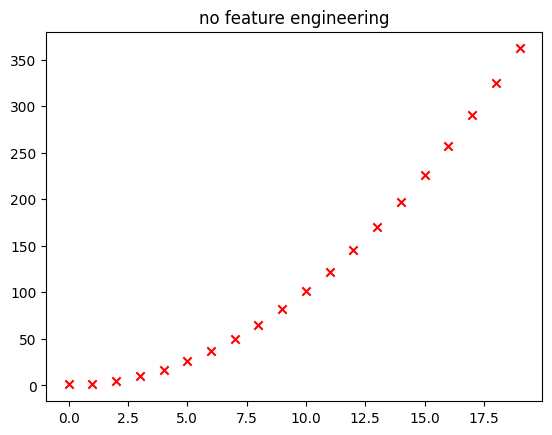

In [38]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)


model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Well, as expected, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

In [3]:

x = np.arange(0, 20, 1)
y = 1 + x**2
X = x**2    

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


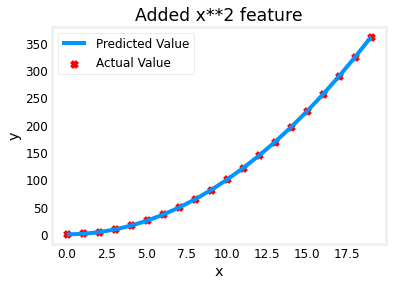

In [7]:
X = X.reshape(-1, 1) 
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Great! near perfect fit. Notice the values of $\mathbf{w}$ and b printed right above the graph: `w,b found by gradient descent: w: [1.], b: 0.0490`. Gradient descent modified our initial values of $\mathbf{w},b $ to be (1.0,0.049) or a model of $y=1*x_0^2+0.049$, very close to our target of $y=1*x_0^2+1$. If you ran it longer, it could be a better match. 

<font size = '3'>Explain the difference between min-max scaling and z-score normalization.<font>

<font size = '4'><b>Min-Max Scaling</b></font>

Min-max scaling transforms the data to fit within a specified range, typically <code>[0, 1]</code> or <code>[-1, 1]</code>. It is achieved by subtracting the minimum value of the feature and then dividing by the range (the difference between the maximum and minimum values of the feature). This scaling method ensures that all features contribute equally to the result but does not handle outliers well; extreme values can skew the scaled data significantly.

$X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$



In [40]:
import numpy as np

data = np.array([2,4,6,3,2,6,3,-2])

def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)
min_max_scaled_data = min_max_scaling(data)
print("Min-Max Scaled Data:", min_max_scaled_data)


Min-Max Scaled Data: [0.5  0.75 1.   0.62 0.5  1.   0.62 0.  ]


<font size = '4'><b>Z-Score Normalization (Standardization)</b></font>

Z-score normalization rescales data so that they have the properties of a standard normal distribution with a mean (μ) of 0 and a standard deviation (σ) of 1. Unlike min-max scaling, standardization does not bound values to a specific range, which means that outliers can still be present after standardization. However, it is less affected by outliers in the data compared to min-max scaling.

$X_{\text{standardized}} = \frac{X - \mu}{\sigma}$


In [41]:
def z_score_normalization(data):
    mean_val = np.mean(data)
    std_dev = np.std(data)
    return (data - mean_val) / std_dev
z_score_normalized_data = z_score_normalization(data)
print("Z-Score Normalized Data:", z_score_normalized_data)


Z-Score Normalized Data: [-0.42  0.42  1.25  0.   -0.42  1.25  0.   -2.09]


<b>Handling Outliers Questions:</b>

<font size = '3'>What are outliers, and why might they impact machine learning models?</font>

<font size = '4.4'><b>What are Outliers?</b></font>

Imagine you're in a classroom where most students are between 10 and 12 years old, but there's one student who is 16. That older student stands out from the rest – they're an outlier. In data terms, an outlier is like that older student; it's a piece of data that is very different from all the others. For example, if most people in a survey say they're happy 7 out of 10 times, but one person says they're happy 0 out of 10 times, that person's response is an outlier.

<font size='4.4'><b>Why Do Outliers Matter?</b></font>

-  <b>They Can Trick Us:</b> If we're not careful, outliers can make us think something is true for all the data when it's actually not. It's like thinking all students are older just because of that one 16-year-old student in the classroom.

-  <b>Learning Gets Harder:</b> When a computer tries to learn from data (like when it's trying to predict something), outliers can make it harder. The computer might focus too much on the outliers and not enough on the regular data. It's like trying to understand what most kids like by only looking at what the oldest kid likes.

-  <b>Not All Models Handle Them Well:</b> Some ways that computers learn are more upset by outliers than others. Imagine if you were making a rule that kids under 13 get a child ticket and anyone older gets an adult ticket. The 16-year-old would be an exception, making it harder to make a simple rule.

<font size = '4.4'><b>What Can We Do About Outliers?</b></font>

-  <b>Detection:</b> Before deciding how to handle outliers, it's crucial to detect them. This can be done using statistical methods (like Z-scores or IQR), visualization techniques (like box plots or scatter plots), or advanced algorithms designed to identify outliers in multidimensional data.

-  <b>Removal:</b> If outliers are due to errors or are not representative of the population you want to model, removing them might be appropriate. However, this decision should be made carefully, considering the potential loss of valuable information.

-  <b>Transformation:</b> Applying transformations to the data (like logarithmic or square root transformations) can reduce the effect of outliers by compressing the scale of extreme values.

-  <b>Imputation:</b> In some cases, outliers can be replaced with values calculated based on other data points, such as the median or mean of the dataset, though this can potentially introduce bias.

-  <b>Robust Methods:</b> Using algorithms and techniques that are less sensitive to outliers is another strategy. For example, using median values instead of means for central tendency or employing models like Random Forests can reduce the impact of outliers.

-  <b>Removal</b>

Removing outliers is the simplest approach. This method involves deleting observations that are considered outliers. It's straightforward but should be used with caution, as it can lead to a significant reduction in data size and potential loss of valuable information.

In [46]:
import numpy as np
import pandas as pd

data = pd.DataFrame({'Value': [10, 12, 12, 14, 12, 11, 10, 15, 300, 11, 12, 14, 13]})

Q1 = data['Value'].quantile(0.25)
Q3 = data['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['Value'] >= lower_bound) & (data['Value'] <= upper_bound)]


-  <b>Capping/Winsorizing</b>

Capping (or Winsorizing) involves replacing the outlier values with a specified percentile of the data (e.g., the 1st and 99th percentiles). This method preserves the size of the dataset but can introduce bias.

In [48]:
from scipy.stats import mstats
winsorized_data = mstats.winsorize(data['Value'], limits=[0.05, 0.05])
winsorized_data = pd.DataFrame(winsorized_data, columns=['Value'])


-  <b>Transformation</b>

Applying a mathematical transformation can reduce the impact of outliers. Common transformations include logarithmic, square root, or Box-Cox transformations. These transformations can make the data more normal, thereby lessening the influence of outliers.

In [49]:
data['Value_Log'] = np.log(data['Value'] + 1)
data['Value_Sqrt'] = np.sqrt(data['Value'])
from scipy import stats
data['Value'], fitted_lambda = stats.boxcox(data['Value'] + 1)  


-  <b>Imputation</b>

Imputation involves replacing outliers with more representative values, such as the median or mean of the dataset. This method keeps the dataset size intact but can affect the distribution of the data.

In [50]:
median = data['Value'].median()
data['Value'] = np.where((data['Value'] < lower_bound) | (data['Value'] > upper_bound), median, data['Value'])
